<h1 style="text-align: center;">&nbsp;<img style="font-size: 0.9em;" src="https://www.hospitalitynet.org/picture/153007157/travelers-push-tripadvisor-past-1-billion-reviews-opinions.jpg?t=1587981992" alt="" width="300" height="100" /><span style="font-family: tahoma, arial, helvetica, sans-serif; font-size: large;"><span style="font-size: x-large;">     Analyse exploratoire des données (EDA)</span></span><span style="font-family: tahoma, arial, helvetica, sans-serif; font-size: large;">&nbsp; &nbsp; &nbsp;&nbsp;</span>&nbsp;<img src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?fit=532%2C540&amp;ssl=1" alt="" width="150" height="150" />&nbsp;</h1>
<p style="text-align: center;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;de Lucie Gabagnou et Yanis Rehoune</p>

### Installation de l'environnement

In [1]:
import os
os.getcwd()

'/Users/luciegabagnou/Documents/MOSEF/PYTHON/projet_trip_advisor/sentiment-analysis-tripadvisor/notebooks'

In [2]:
current_path=os.path.dirname(os.getcwd())
os.chdir(current_path)
print(os.getcwd())

/Users/luciegabagnou/Documents/MOSEF/PYTHON/projet_trip_advisor/sentiment-analysis-tripadvisor


In [3]:
print(os.getcwd())

/Users/luciegabagnou/Documents/MOSEF/PYTHON/projet_trip_advisor/sentiment-analysis-tripadvisor


Dans un premier temps, on peut regarder les distributions des variables. Les variables sont quasiment toutes catégorielles, on propose de regarder les effectifs des catégories.

In [4]:
!pip install -r requirements.txt

In [82]:
from collections import Counter
import pandas as pd
import numpy as np


import plotly.graph_objs as go
import plotly.express as px

from scripts.viz.viz import plot_bar_chart,plot_top_ngrams,plot_wordcloud

from scripts.utils import flatten

In [83]:
clean_data=pd.read_json("data/clean_data.json")

In [84]:
clean_data.head(10)

,average_note,location,name,number_reviews,ranking,reviews,url,price,cuisine,longitude,latitude,clean_reviews,ratings
0,NaN,"225 boulevard Voltaire, 75011 Paris France",Shinzzo Paris 75011,0,NaN,[],https://www.tripadvisor.fr/Restaurant_Review-g...,[],"[Chinoise, Japonaise, Asiatique]",2.390974,48.851526,[],[]
1,3.0,"33 Rue Saint Jacques, 75005 Paris France",Soho Trattoria,76,1430.0,[Bravo Maria Meilleur service:Dîner très agréa...,https://www.tripadvisor.fr/Restaurant_Review-g...,[],"[Italienne, Pizza]",2.345867,48.851156,[[bravo marier meilleur service diner agreabl ...,"[[5.0], [2.0], [3.0], [3.0], [5.0], [1.0], [4...."
2,4.0,"16 rue Guillaume Bertrand, 75011 Paris France",Restaurant El Camino,41,74.0,[Restaurant correct mais sans plus :Un restaur...,https://www.tripadvisor.fr/Restaurant_Review-g...,[€],"[Latino, Sud-américaine]",2.380629,48.863593,[[restaurer correct restaurant chilien correct...,"[[3.0], [5.0], [5.0], [4.0], [5.0], [2.0], [5...."
3,4.5,"44 rue des Vinaigriers, 75010 Paris France",Gravity Bar,143,2258.0,[Superbe adresse 🔥:L'expérience était vraiment...,https://www.tripadvisor.fr/Restaurant_Review-g...,[€€-€€€],"[Végétariens bienvenus, Plats sans gluten]",2.360821,48.873218,[[superbe adresse experience vraiment top equi...,"[[5.0], [5.0], [5.0], [5.0], [5.0], [5.0], [4...."
4,4.5,"5 rue du Nil, 75002 Paris France",Frenchie - Rue du Nil,1342,551.0,"[Pas mal, sans plus.:Des associations de saveu...",https://www.tripadvisor.fr/Restaurant_Review-g...,[€€€€],"[Française, Végétariens bienvenus, Plats sans ...",2.347922,48.867744,[[mal plus.:de association saveur original reu...,"[[3.0], [4.0], [5.0], [4.0], [1.0], [3.0], [5...."
5,NaN,"1 Rue Falguière, 75015 Paris France",L'EntreMets,0,NaN,[],https://www.tripadvisor.fr/Restaurant_Review-g...,[€€-€€€],[Européenne],2.317711,48.844197,[],[]
6,4.0,"6, rue de Renard, 75004 Paris France",Le Renard,122,475.0,[Bonne adresse !:Nous sommes allés dans ce res...,https://www.tripadvisor.fr/Restaurant_Review-g...,[€€-€€€],"[Française, Bar, Européenne]",NaN,NaN,[[bon adresse aller restaurer couple bon surpr...,"[[5.0], [5.0], [4.0], [2.0], [4.0], [5.0], [4...."
7,4.5,"22-24 Rue Du Faubourg Saint-Martin, 75010 Pari...",Vegebowl,285,1234.0,"[Belle expérience :Nous sommes arrivés à 13h, ...",https://www.tripadvisor.fr/Restaurant_Review-g...,[€],"[Chinoise, Asiatique, Thaï]",2.356209,48.869900,[[bel experience arriver 13h table libre comme...,"[[5.0], [4.0], [4.0], [4.0], [5.0], [4.0], [5...."
8,4.0,"15 Rue du 8 Mai 1945, 75010 Paris France",Station Nord-Est,72,5461.0,"[Super ambiance:Super restaurant, on y mange b...",https://www.tripadvisor.fr/Restaurant_Review-g...,[€€-€€€],"[Française, Marocaine, Méditerranéenne]",2.356842,48.876278,[[super ambiance super restaurant manger bien ...,"[[5.0], [5.0], [5.0], [2.0], [3.0], [1.0], [5...."
9,4.0,"13 rue du commandant Rene Mouchotte, 75014 Par...",Jazz Café Montparnasse,112,2391.0,[Agréable dîner - concert parisien :Après plus...,https://www.tripadvisor.fr/Restaurant_Review-g...,[€€-€€€],[Française],2.318755,48.837551,[[agreabl diner concert parisien passage const...,"[[4.0], [4.0], [4.0], [5.0], [5.0], [5.0], [5...."


#### Type de cuisine

In [85]:
cuisine_types=clean_data["cuisine"]


In [86]:
cuisine_types=clean_data["cuisine"].values.tolist()


In [91]:
clean_reviews=clean_data["clean_reviews"].tolist()

In [92]:
clean_reviews

[[],
 ['[bravo marier meilleur service diner agreabl soho cinquième  marier attention sympa johnny]',
  '[mecontent restaurer restaurant attrape tourist excessivement bon cuisine charcuterie bon pate pizza cuire pate non-cuisine  grand manque organisation]',
  '[mitige cadre sympa pate pizza excellent avoir prendre dessert crepe cuire chocolat faire nutella creme chantilly vanillee nom prix raisonnable]',
  '[passer chemin :rien vrai trattoria italien service revoir pate non cuisinees!le cher manger]',
  '[sac oublier beaucoup garde sac oublier service niquel personnel bien 10000/10]',
  '[inadmissible inadmissible restaurer affiche jusque heure attendre minute servir rassurer occasion voir]',
  '[sympathique bon efficace.:ambiance personnel agreable plat pate bon copieux prix plat correct soda cher]',
  '[horrible raciste manager barbe traiter mepris comprendre langue francais comble obliger filer numero telephone trouver bel souriante lieu]',
  '[pizza bon service horrible pizza bon 

In [10]:
### On stocke les types de cuisine dans une liste puis on compte l'occurence de chacun de ces types dans l'ensemble des restaurants
cuisine_types=flatten(clean_data["cuisine"].values.tolist())
counter_cuisine_types=Counter(cuisine_types)
counter_cuisine_types = dict(sorted(counter_cuisine_types.items(), key=lambda x: x[1], reverse=True))

In [11]:
plot_bar_chart(list(counter_cuisine_types.keys()), list(counter_cuisine_types.values()), 'Cuisine Type Counts')

Il y a beaucoup de types de nourriture, mais nous préférons laisser l'ensemble des modalités car elles représentent toutes une idée. 

#### Ratings

On fait la même chose pour les ratings:

In [30]:
ratings=clean_data["average_note"].values.tolist()
rating_count=Counter(ratings)
counter_cuisine_types = dict(sorted(rating_count.items(), key=lambda x: x[1], reverse=True))
plot_bar_chart(list(counter_cuisine_types.keys()), list(counter_cuisine_types.values()), 'Rating Distribution')

In [13]:
clean_corpus=flatten(clean_data["clean_reviews"].values.tolist())

In [14]:
plot_top_ngrams(clean_corpus,20,(2,2))

In [16]:
plot_top_ngrams(clean_corpus,20,(3,3))

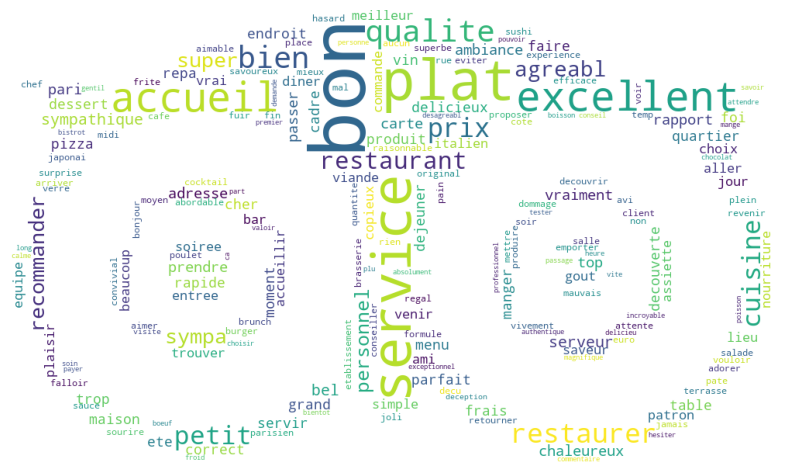

In [28]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_wordcloud(text, max_words=200, background_image=None, background_color='white', width=800, height=400):
    if background_image:
        mask = np.array(Image.open(background_image))
    wordcloud = WordCloud(width=width, height=height, background_color=background_color, max_words=max_words, collocations=False, mask=mask)
    wordcloud.generate(text)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


plot_wordcloud("".join([str(word) for word in clean_corpus]),background_image="/Users/luciegabagnou/Documents/MOSEF/PYTHON/projet_trip_advisor/sentiment-analysis-tripadvisor/TripAdvisor.jpg")

In [62]:
data_with_cook_modalities_splitted=clean_data.explode('cuisine')
data_with_cook_modalities_splitted["cuisine"]=data_with_cook_modalities_splitted["cuisine"].fillna(data_with_cook_modalities_splitted["cuisine"].mode()[0])

In [63]:
data_with_cook_modalities_splitted

,average_note,location,name,number_reviews,ranking,reviews,url,price,cuisine,longitude,latitude,clean_reviews,ratings
0,NaN,"225 boulevard Voltaire, 75011 Paris France",Shinzzo Paris 75011,0,NaN,[],https://www.tripadvisor.fr/Restaurant_Review-g...,[],Chinoise,2.390974,48.851526,[],[]
0,NaN,"225 boulevard Voltaire, 75011 Paris France",Shinzzo Paris 75011,0,NaN,[],https://www.tripadvisor.fr/Restaurant_Review-g...,[],Japonaise,2.390974,48.851526,[],[]
0,NaN,"225 boulevard Voltaire, 75011 Paris France",Shinzzo Paris 75011,0,NaN,[],https://www.tripadvisor.fr/Restaurant_Review-g...,[],Asiatique,2.390974,48.851526,[],[]
1,3.0,"33 Rue Saint Jacques, 75005 Paris France",Soho Trattoria,76,1430.0,[Bravo Maria Meilleur service:Dîner très agréa...,https://www.tripadvisor.fr/Restaurant_Review-g...,[],Italienne,2.345867,48.851156,[[bravo marier meilleur service diner agreabl ...,"[[5.0], [2.0], [3.0], [3.0], [5.0], [1.0], [4...."
1,3.0,"33 Rue Saint Jacques, 75005 Paris France",Soho Trattoria,76,1430.0,[Bravo Maria Meilleur service:Dîner très agréa...,https://www.tripadvisor.fr/Restaurant_Review-g...,[],Pizza,2.345867,48.851156,[[bravo marier meilleur service diner agreabl ...,"[[5.0], [2.0], [3.0], [3.0], [5.0], [1.0], [4...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,4.0,"156 boulevard Voltaire, 75011 Paris France",PHO 156,86,200.0,[Excellent:Au détour d'une rue nous avons déc...,https://www.tripadvisor.fr/Restaurant_Review-g...,[€],Vietnamienne,2.382831,48.856004,[[excellent detour rue decouvert restaurer cui...,"[[5.0], [5.0], [1.0], [5.0], [5.0], [5.0], [2...."
997,4.0,"156 boulevard Voltaire, 75011 Paris France",PHO 156,86,200.0,[Excellent:Au détour d'une rue nous avons déc...,https://www.tripadvisor.fr/Restaurant_Review-g...,[€],Végétariens bienvenus,2.382831,48.856004,[[excellent detour rue decouvert restaurer cui...,"[[5.0], [5.0], [1.0], [5.0], [5.0], [5.0], [2...."
998,NaN,"Rue Gervex, Paris France",Le Riad,0,NaN,[],https://www.tripadvisor.fr/Restaurant_Review-g...,[],Marocaine,2.298242,48.888137,[],[]
998,NaN,"Rue Gervex, Paris France",Le Riad,0,NaN,[],https://www.tripadvisor.fr/Restaurant_Review-g...,[],Méditerranéenne,2.298242,48.888137,[],[]


In [64]:
#cooktype_exploded_data["average_note"]=cooktype_exploded_data["average note"].apply(lambda x: x[0])
list_common_cooktype=list(dict(list(counter_cuisine_types.items())[:10]).keys())
print(list_common_cooktype)


['Française', 'Européenne', 'Végétariens bienvenus', 'Asiatique', 'Italienne', 'Bar', 'Méditerranéenne', 'Japonaise', 'Café', 'Pizza']


In [74]:
all_text="".join([str(word) for word in clean_corpus])
cooktype_texts=[]
for cooktype in list_common_cooktype:
    cooktype_texts.append(data_with_cook_modalities_splitted[data_with_cook_modalities_splitted['cuisine'].str.contains(cooktype)].groupby('cuisine')['clean_reviews'].apply(lambda x: " ".join([str(elem) for elem in x])).values.tolist())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])
tf.get_feature_names_out()

In [66]:
print(list_common_cooktype)
for cooktype in list_common_cooktype:  
    cooktype_text = data_with_cook_modalities_splitted[data_with_cook_modalities_splitted['cuisine'].str.contains(cooktype)].groupby('cuisine')['clean_reviews'].apply(lambda x: " ".join([str(elem) for elem in x])).values.tolist()
    
    plot_top_ngrams(cooktype_text,10,(1,1)).show()

['Française', 'Européenne', 'Végétariens bienvenus', 'Asiatique', 'Italienne', 'Bar', 'Méditerranéenne', 'Japonaise', 'Café', 'Pizza']


#### Analyse de sentiments

La polarité est un concept utilisé en analyse de sentiments qui mesure l'attitude subjective d'un texte ou d'un commentaire. Il peut prendre différentes formes comme positive, négative ou neutre. La polarité d'un commentaire peut être calculée en utilisant des outils de traitement de la langue naturelle, comme des lexiques de mots ou des modèles de désentiment pré-entraînés.

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
data_with_reviews_splitted = clean_data.explode('clean_reviews')
data_with_reviews_splitted['ratings'] = data_with_reviews_splitted.apply(lambda x: x.ratings[x.clean_reviews.index(x.clean_reviews)], axis=1)

In [ ]:
data_with_reviews_splitted["polarity"]=data_with_reviews_splitted["clean_reviews"].apply(lambda x: TextBlob(x).sentiment.polarity).round(3)

In [ ]:

trace = go.Scatter(x=data_with_reviews_splitted["polarity"].values.tolist(), y=data_with_reviews_splitted["ratings"].values.tolist(), mode='markers')
layout = go.Layout(title='Relation entre les scores de polarité et les ratings',
                   xaxis=dict(title='Score de polarité'),
                   yaxis=dict(title='Notation'))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [ ]:
data_with_reviews_splitted.sort_values(by="polarity",ascending=False).head(20)

In [ ]:
#### LES MOTS LES PLUS EMPLOYES POUR BON AVIS VS MAUVAIS

data_with_reviews_splitted["good_review"],data_with_reviews_splitted["bad_review"]=np.where(data_with_reviews_splitted["polarity"]>0.95,1,0), np.where(data_with_reviews_splitted["polarity"]<0,1,0)


In [ ]:
plot_wordcloud(data_with_reviews_splitted["clean_reviews"][data_with_reviews_splitted["good_polarity_review"]==1]
plot_wordcloud(data_with_reviews_splitted["clean_reviews"][data_with_reviews_splitted["bad_polarity_review"]==1]


Si on trouve le score de polarité pertinent pour estimer les sentiments évoqués dans un avis, (en fonction des ratings donnés) alors on peut directement exploiter cet élement par la suite. Ainsi, nous ferons un modèle de type Analyse de sentiments où les labels seront les ratings.

In [ ]:
data_with_polarity_scores=data_with_reviews_splitted.groupby("name")['polarity'].mean()


In [ ]:

# Créer une carte de base de Paris avec les coordonnées GPS
cooktype_exploded_data[['lat', 'long']] = cooktype_exploded_data['coordinates'].apply(pd.Series)
cooktype_exploded_data
fig = px.scatter_mapbox(cooktype_exploded_data,lat="lat", lon="long", zoom=10,text=cooktype_exploded_data['name'],color=cooktype_exploded_data['average note'])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Afficher la carte
fig.show()



# Créer une carte de base de Paris avec les coordonnées GPS
cooktype_exploded_data=cooktype_exploded_data.dropna(subset=["name","average note"])
cooktype_exploded_data["average note"]=cooktype_exploded_data["average note"]
cooktype_exploded_data[['lat', 'long']] = cooktype_exploded_data['coordinates'].apply(pd.Series)
fig = px.scatter_mapbox(cooktype_exploded_data.drop_duplicates(subset=["name"]).query("cuisine == @list_common_cooktype ")
,lat="lat", lon="long", zoom=10,text=cooktype_exploded_data.drop_duplicates(subset=["name"]).query("cuisine == @list_common_cooktype ")
['name'],color=cooktype_exploded_data.drop_duplicates(subset=["name"]).query("cuisine == @list_common_cooktype ")
['cuisine'])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [ ]:
import plotly.express as px
fig = px.histogram(cooktype_exploded_data, x="number reviews") 
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(cooktype_exploded_data.drop_duplicates(subset=["name"]).query("cuisine == @list_common_cooktype"), x="average note",color="cuisine") 
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(cooktype_exploded_data, x="total_bill", y="tip", color="sex", marginal="rug",
                   hover_data=df.columns)
fig.show()

In [ ]:

french_stopwords = set(stopwords.words('french'))
filtre_stopfr =  lambda text: [token for token in text if token.lower() not in french_stopwords]


In [ ]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))